In [1]:
# Math and stats libraries
import math
import numpy as np
from scipy import stats
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

# Basic machine learning workflow

Refer back to **4-2_Machine-Learning-Review.pdf** to review your key terms. Below is a simplified workflow:

1. Do you want to predict something? 
    - Yes = supervised learning (y ~ X)
    - No = unsupervised learning (~ X)
2. If supervised:
    - Syntax looks like this: **y ~ X** ([use x to predict y](https://stats.stackexchange.com/questions/207425/why-do-we-say-the-outcome-variable-is-regressed-on-the-predictors)), or "regress y on X".
    - **y** is the thing we want to predict! (dependent/target/outcome variable)
    - **x** is the thing(s) we use to do the predicting (independent/predictor/input variable)
3. If supervised:
    - perform **regression** if the **y** variable is continuous
    - perform **classification** if the **y** variable is discrete/categorical
4. If unsupervised: 
    - Syntax looks like this: **~ X**
    - We only have **X** variables, and we want to see how they sort on their own accord without trying to predict anything.
5. Handle missing data
    - Missing data should be handled somehow. [Listwise deletion](https://en.wikipedia.org/wiki/Listwise_deletion) is common but not preferred because of the amount of information that is lost. [Mean imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)#Mean_substitution) is also used but is sensitive to outliers. [Median imputation](https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median) is often reliable and interpretable. 
6. Convert categorical variables to indicators
    - Use [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) to your advantage! Most supervised algorithms handle factor/categorical data poorly (decision trees being a main exception). 
7. Split the data
    - [Split the original dataset](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) so that (arbitrarily) 70% is assigned to the **training set** and the remaining 30% to the **test set**. 
      
 
8. Fit the model to the training set and evaluate its performance. 
    - Fit the data to the training set so it can "learn" the relationships between the **X and y** variables. 
    - Then use a [performance](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce) [metric](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) to see how well the model fit the data. 
   
    - See how well the model performs on the test set; hopefully we see roughly similar performances for the training and test sets. 
    - The model is **overfit** if the model performs well on the training dataset but poorly on the test dataset. 

# The value of understanding simple linear regression

Doing a simple [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression step-by-step provides a way to understand the supervised machine learning process. 



### 1. Generate some data

First, let's generate toy predictor X and response y variables and compute their means. This will be our "training set":

In [9]:
# Generate toy predictor (x) and response (y) variables
X = np.array([1, 1.5, 4, 7])
y = np.array([4, 3, 8.2, 9])

# Convert to data frame
df = pd.DataFrame({"X": X,
                   "y": y})
df

,X,y
0,1.0,4.0
1,1.5,3.0
2,4.0,8.2
3,7.0,9.0


### 2. Calculate means of x and y

In [12]:
mean_X = round(sum(df.X) / len(df.X), 2)
mean_y = round(sum(df.y) / len(df.y), 2)
print("mean of x is:", mean_X)
print("mean of y is:", mean_y)

mean of x is: 3.38
mean of y is: 6.05


In [34]:
xm

[3.375, 3.375, 3.375, 3.375]

### 3. Plot the data

<Axes: xlabel='X', ylabel='y'>

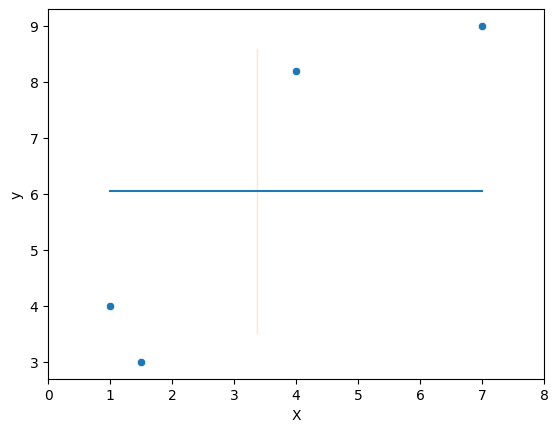

In [35]:
ym = [np.mean(y) for i in X]
xm = [np.mean(X) for i in y]

fig, ax = plt.subplots()
ax.set(xlim=(0,8))

sns.scatterplot(data=df, x='X', y='y')
sns.lineplot(x=X, y= ym)
sns.lineplot(x=xm, y= y)


### 4. Calculate the error for each observation

Numpy allows us to perform "vectorized" operations, such as subtracting the mean of `X` from each `X` value or the mean of `y` from each `y` value. That is, we can do math on arrays of numbers simultaneously: 

In [37]:
print("Point errors for x is:", X - mean_X)
print("Point errors for y is:", y - mean_y)

Point errors for x is: [-2.38 -1.88  0.62  3.62]
Point errors for y is: [-2.05 -3.05  2.15  2.95]


### 5. Calculate the beta coefficients

Remember we're trying to find the equation for the *line of best fit*, which minimizes the sum of the squared errors (the vertical distances between each point and the regression line). This line has a few properties:

1. y_intercept (or B0 coefficient): where does the line intercept the y-axis?
2. slope (or B1 coeficcient): for each X, how much increase in y?

In [47]:
## Estimate the B1 coefficient (slope)
B1 = sum((X - mean_X) * (y-mean_y)) / sum((X - mean_X) **2)
print("slope (B1) is equal to", round(B1, 5))

## Estimate B0 coefficient (intercept)
B0 = mean_y - (B1 * mean_X)
print("intercept (B0) is equal to", round(B0, 5))

slope (B1) is equal to 0.99724
intercept (B0) is equal to 2.67933


<Axes: xlabel='X', ylabel='y'>

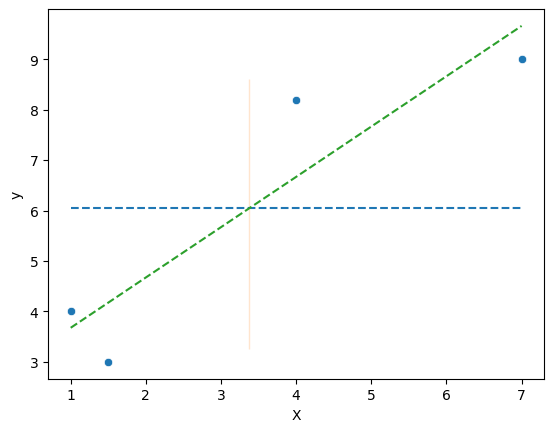

In [48]:
# INSERT 
reg = B0 + B1*X

sns.scatterplot(data=df, x='X', y='y')
sns.lineplot(x=X, y= ym, linestyle='--')
sns.lineplot(x=xm, y= y, linestyle='--')
sns.lineplot(x=X, y=reg, linestyle='--')


### 6. Plot the best fit line

Now we can do all of this work using the `regplot()` function from Seaborn - read more about it [here](https://seaborn.pydata.org/generated/seaborn.regplot.html). Basically, we're skipping all of the calculations we just did.

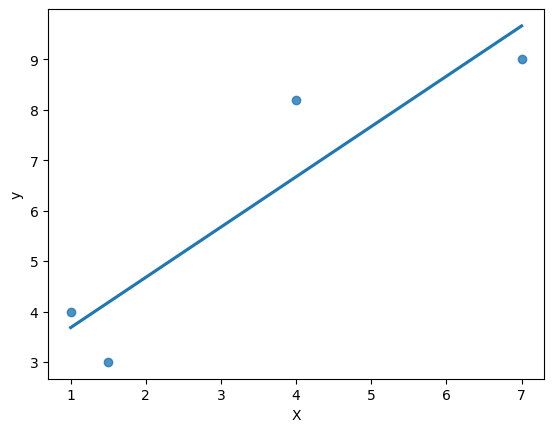

In [55]:
p = sns.regplot(x = "X", y = "y", 
            data = df, 
            ci = None); 

Note that the plot starts at 1 at the x-axis so we don't actually see the intercept.

### 7. Generate predicted values

Now that we have calculated the best fit line, we can generate predicted values and assess the performance of the model.

In [56]:
# Generate predicted y values by plugging our x values into the equation
y_hat = B0 + (B1 * X)

pd.DataFrame({"y": y, "predicted y": y_hat})

,y,predicted y
0,4.0,3.676567
1,3.0,4.175187
2,8.2,6.668289
3,9.0,9.660012


### 8. Evaluate performance

Our performance metric will be [root mean square error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation), or the standard deviation of the residuals (aka prediction errors). Error is measured as the vertical distance from a data point to the best fit line. 

However, we have to do some calculations first before we get to RMSE! 

In [57]:
# First, calculate the error for each observation by subracting the predicted value from it:
y_error = y - y_hat
print(y_error)

[ 0.32343306 -1.17518733  1.53171071 -0.66001164]


In [58]:
# Second, calculate the square of each of these errors 
# (we do this to treat positive and negative discrepancies in the same way):
y_error_sq = y_error ** 2
print(y_error_sq)

[0.10460895 1.38106525 2.34613771 0.43561536]


In [59]:
# Third, sum these values
sum_squared_error = sum(y_error_sq)
print(sum_squared_error)

4.267427273047831


In [60]:
# Fourth, calculate the RMSE - take the square root of the summed squared error divided by the length of y:
RMSE = math.sqrt(sum_squared_error / len(y))
print(round(RMSE, 5))

1.03289


Note that our RMSE gives us a measure of difference between our predicted values and the actual values. An RMSE of 0 (almost never achieved in practice) would indicate a perfect fit to the data.

### 9. How did we do? 

Compare the slope and intercept from `stats.linregress` to our estimations by hand (under step 5). Are they the same? 

In [61]:
lin_mod = stats.linregress(X, y)
print("intercept is", lin_mod.intercept)
print("slope is", lin_mod.slope)

intercept is 2.684297520661157
slope is 0.9972451790633609


Now calculate RMSE from the `sklearn.metrics.mean_squared_error` function to compare to our estimations by hand. How did we do? 

In [62]:
# Note the squared=false parameter as we took the square root

metrics.mean_squared_error(y, y_hat, squared=False)

1.0328876116315646

# Logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) provides a useful way to classify text. It is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome: something that can take two values such as true/false, yes/no, and so on.

First, create some toy data:

In [ ]:
study = pd.DataFrame({'Study_Hours' : [2.0, 6.9, 1.6, 9.8, 1.1, 5.8, 3.4, 8.5, 6.7, 1.6, 8.6, 3.4, 9.4, 5.6, 12.0, 3.2, 3.5, 6, 9.7, 6.5],
                      'Grade' : [60.0, 83.6, 35.4, 79.2, 42.4, 98.2, 67.6, 84.0, 93.8, 64.4, 100.0, 61.6, 100.0, 69.4, 98.4, 41.8, 72.0, 59.0, 90.8, 100.0],
                      'Pass' : [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]})
study

### Plot the data

First, let's run a linear regression between hours studied and grade. We'll use the `LinearRegression` method from `sklearn` as well this time.

In [ ]:
# note that LinearRegression() expects 2-D data of shape [n_samples, n_features] for x value

X = study.drop(columns=["Pass", "Study_Hours"])
y = np.array(study.Grade)

lin_r = LinearRegression()
lin_r.fit(X,y)
print(lin_r.coef_, lin_r.intercept_)

# or with stats package
print(stats.linregress(x = study.Study_Hours, y = study.Grade))

In [ ]:
# Here's the regression plot between study hours and grade
sns.regplot(x = "Study_Hours", y = "Grade", 
            data = study, color = "k", ci=None,
            line_kws={'color':'purple'});

# Intuiting the Logistic Regression Model

But what happens if your **y** variable is categorical and not continuous? Suppose we don't care about the `Grade` score, but we just care if you pass the course or not?

0 = no pass  
1 = pass

> NOTE: Recall that logistic regression can perform both regression and classification depending on the distribution of the y variable. For classification, we are interested in the _class probabilities_ of a 1 or a 0 at some threshold, for example: < 0.5 (for 0) and >= 0.5 (for 1). This is called *binary logistic regression*.

In [ ]:
study.head()

How would we fit a line to that? That's where the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) can be handy. The general logistic function is:

$ f(x) = \frac{1}{1 + e^{-x}} $

# The `LogisticRegression` function

Let's go back to `sklearn` and save our logistic model in a variable named `lr`:

In [ ]:
log_r = LogisticRegression(random_state=41)

In [ ]:
study.head()

In [ ]:
X = study.drop(columns=["Pass", "Grade"])
y = study["Pass"]

We can use the `fit` function on our `X` and `y`. Recall that "fitting a model" is the process of specifying the model that provides the line of best fit for our data.

In [ ]:
log_r.fit(X, y)

Let's quickly look at the `score` of our model, which we can interpret as its accuracy.

In [ ]:
log_r.score(X, y)

Turns out 85% of our data are correctly predicted.

Finally, let's run the `regplot` from seaborn again (note this is running logistic regression all on its own).

In [ ]:
sns.regplot(x = study.Study_Hours, y = study.Pass, 
            logistic = True, 
            color = "k",
            line_kws={'color':'red'});

# Train/test split

Well, let's see how the logistic regression performs on training and test set data. 

In [ ]:
# Define x and y variables for training and test sets. Split the data! 
X_train, X_test, y_train, y_test = train_test_split(
    # Which dataset? 
    study, 
    
    # What is the outcome variable?
    study.Pass,
    
    # How much data should be assigned to the test set? 
    # 1 minus this number will be automatically assigned to the training set
    test_size = 0.30, 
    
    # Ensure we get the same train/test split each time
    random_state = 40,

    # Ensure that our y labels are balanced
    stratify = y
)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
# Use default settings except for the solver!
# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
logistreg = LogisticRegression(solver = "liblinear")
logistreg

In [ ]:
# Fit the model to the training data
logistreg.fit(X_train, y_train)

### Training set classification accuracy

In [ ]:
# Calculate classification accuracy on the training set
# Nice! 
logistreg.score(X_train, y_train)

In [ ]:
# Generate predicted y values based on the x test set data
predictions = logistreg.predict(X_test)
predictions

### Test set classification accuracy

In [ ]:
# Calculate classification accuracy on the test set
score = logistreg.score(X_test, y_test)
print(score)

In [ ]:
# Create a confusion matrix: https://en.wikipedia.org/wiki/Confusion_matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
# Fancy it up! Use plt.savefig() to export
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = ".0f", 
            cbar = False, linewidths = 2, 
            square = True, cmap = 'YlGnBu', annot_kws={"size": 20})
plt.ylabel('Actual y label')
plt.xlabel('Predicted y label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Other algorithms

This is the gist! Download the [Machine Learning in Python](https://github.com/dlab-berkeley/python-machine-learning) materials to see how other algorithms work. 